# Explainer notebook


# Investigating 911 for suspicious behaviour originating from people in San Francisco 

*The data can be downloaded at: * https://data.sfgov.org/Public-Safety/Law-Enforcement-Dispatched-Calls-for-Service-Close/2zdj-bwza



## 1. Motivation

Our group selected San Franciso city’s open-source public safety data called **“Law Enforcement Dispatched Calls for Service: Closed"**. The data contains only the closed calls that originate from the public through the 911 line, or from police officers upon viewing an incident. It provides such information as the time when the call was received, and closed, when the police unit arrived at the scene and the priority given to the call among others. It indicates whether the Police Incident Report was issued for the case. In that case, the incident would also be added to the dataset we have been working on throughout the course. 
 
 **Our motivation for selecting this dataset:**
 
 1. We chose to use a dataset from the place that we are able to relate to. The first choice would have been data from Copenhagen, however, with no Danish speaker in the group it posed extra challenges. We chose San Francisco as we already got acknowledged with the city more throughout the assignments. 
 
 2. It was interesting to work with the data that is in some sense the ‘’prehistory’’ of the dataset we worked with throughout the course. 
 
 3. Analysing the reports about the “Suspicious person” seemed interesting for the ambiguity of the topic. It was interesting to understand better what importance is given to such public concerns and if possible to learn what is actually considered “suspicious”. 
 
**What we were hoping to deliver regarding user experience:**

We were hoping to create content relevant to a person living in San Francisco. Is there a way to imagine what could they read and find familiar as well as be able to reflect on? 
We wanted to create an experience similar to reading a newspaper, that is informative but easy to consume. We did this by writing an explanatory text but also utilising the support of data visualisations to illustrate but also validate the discussion points. 

Overall, our intended goal was to present the technicalities behind the 911 calls that came from habitats or visitors of the city, the time it takes for police to react, and how the calls are treated ‘’behind the scenes’’, we were also hoping to identify any biases in reaction depending on location/ case and how people understand suspicious behaviour. The latter, we understood from the beginning, might not be possible just with the quantitative data. 





## 2. Basic stats (Data cleaning and preprocessing)

In [4]:
import pandas as pd
import numpy as np

# matplotlib
import matplotlib.ticker as mtick
import matplotlib.pyplot as plt

# plotly
import plotly.io as pio
import plotly.express as px

# seaborn
import seaborn as sns

# Set templates
pio.templates.default = "seaborn"
plt.style.use("seaborn")

# Calplot
import calplot

import os
from urllib.request import urlopen
import json

In [5]:
#csv_a = pd.read_csv('C:/Users/Ke Yang/Desktop/Law_Enforcement_Dispatched_Calls_for_Service__Closed.csv')
csv = pd.read_csv("C:/Users/47458/Downloads/Law_Enforcement_Dispatched_Calls_for_Service__Closed.csv", low_memory=False) 
csv.head()

#For the rest of the assignment take "csv" to obtain clean data

csv_a=csv.copy()


### File size

In [6]:
# Total size of the data

file_size = os.path.getsize("C:/Users/47458/Downloads/Law_Enforcement_Dispatched_Calls_for_Service__Closed.csv")
file_type = {'mb':2}
calculated_size = file_size/ 1024 ** file_type["mb"]
print(f"The MB of the data is {round(calculated_size,2)} MB")

The MB of the data is 2016.21 MB


### Number of rows

In [7]:
df_rows = csv_a.shape[0]
print(f"There are {df_rows} rows in the dataset")

There are 5073715 rows in the dataset


### Number of variables

In [8]:
df_variables = csv_a.columns
df_variables = list(df_variables)
number_of_variables = len(df_variables)
print(f"There are {number_of_variables} variables in the dataset")

There are 36 variables in the dataset


### All 911 calls per type of call. Calls to report a suspicious person are the 4th most common calls

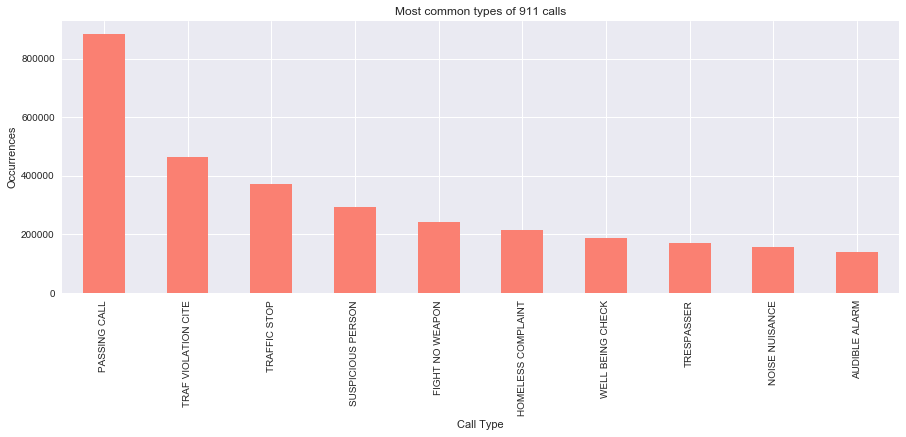

In [9]:
per_category=csv_a['call_type_original_desc'].value_counts().iloc[:10].plot(kind='bar', xlabel='Call Type', ylabel='Occurrences', figsize = (15,5), color = 'Salmon',
                                                                           title= 'Most common types of 911 calls')

<center> <b>Fig 1.</b> <i>Bar chart demonstrates the total occurances of 911 calls per call type in San Francisco </i> <center>
    

# Data cleaning for further observations

### Throughout the assignment we will investigate the cases for calls about the Suspicious Person

In [10]:
csv_a=csv_a[csv_a['call_type_original_desc']=='SUSPICIOUS PERSON']

In [11]:
#change relevant column date and time types to datetime
csv_a['received_datetime']=pd.to_datetime(csv_a['received_datetime'])
# csv_a['entry_datetime']=pd.to_datetime(csv_a['entry_datetime'])
# csv_a['dispatch_datetime']=pd.to_datetime(csv_a['dispatch_datetime'])
# csv_a['enroute_datetime']=pd.to_datetime(csv_a['enroute_datetime'])
csv_a['onscene_datetime']=pd.to_datetime(csv_a['onscene_datetime'])
# csv_a['close_datetime']=pd.to_datetime(csv_a['close_datetime'])


### Date range for relevant data 

In [12]:
date_range = csv_a['received_datetime'].dt.year.sort_values().unique()
print(f"The date range is from {date_range.min()} to {date_range.max()}")

The date range is from 2015 to 2023


### Deleting data from years with not sufficient amount of data

In [13]:
csv_a['received_year'] = csv_a['received_datetime'].dt.year
csv_a=csv_a[~csv_a['received_year'].isin([2015,2023])]

### Keeping the call that originate from the public

The data contains both call from police units that spot the accident at location and from the people who observed and decided to report suspicious behaviour. In alignment to our goal for the assignment we want to keep only the data that originate from the general public. 

In [14]:
#overview flag = Y identifies calls originating from police unit
csv_a=csv_a[csv_a['onview_flag']!='Y']

<br>


## 3. Data analysis

In our data, there are two columns: the original type and the final type. There may be some differences between the two because the type reported by the public over the phone may not match the type defined by the police. This will also be reflected in the analysis below. However, for the analysis of trends and quantities, we will use the original type.During the analysis, we also identified some missing values, which we directly dropped. When analyzing the trend of processing time, we found that there are extreme cases with very long processing time in almost all regions and years, which will be mentioned later. We generated and analyzed statistical values and finally decided to use the median instead of the mean to represent the processing time for that year.

### Final developments of 911 calls that originally were tagged as "Suspicious Person"

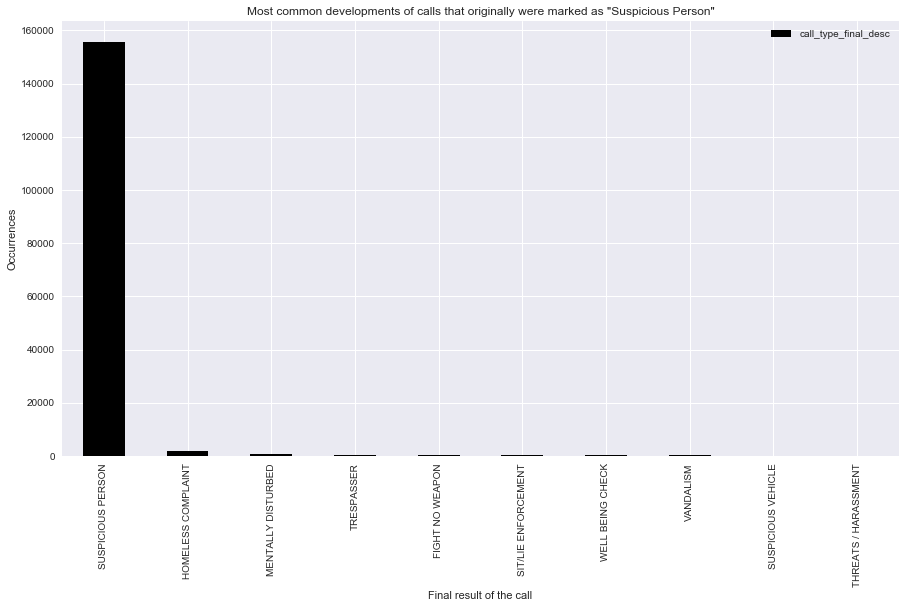

In [15]:


SP_per_end = csv_a["call_type_final_desc"].value_counts()[:10]
count_per_end_category = pd.DataFrame(SP_per_end)
count_per_end_category.plot(kind='bar',  xlabel='Final result of the call', ylabel='Occurrences',  figsize=(15,8), color = 'black',
                           title= 'Most common developments of calls that originally were marked as "Suspicious Person"')


<center> <b>Fig 2.</b> <i>The Bar chart demonstrates the total number of final developments of the calls that originally were defined as calls about the "Suspicious person". The graph shows that the majority of the time calls that were initially defined as "Suspicious person" result in detection of a suspicious person. </i> <center>
    

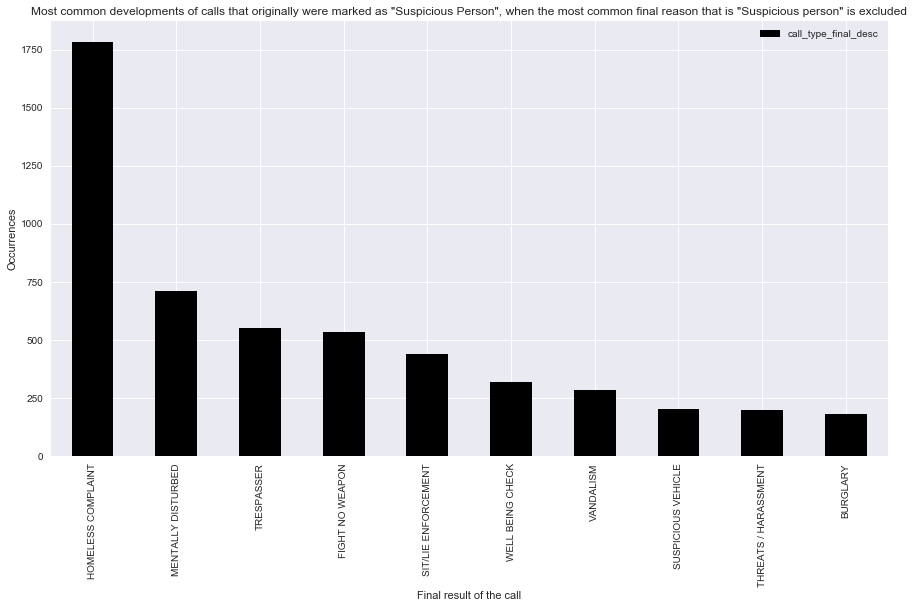

In [16]:
filt_SP = csv_a['call_type_final_desc'] != 'SUSPICIOUS PERSON'
data_no_sp = csv_a.loc[filt_SP]


SP_per_end = data_no_sp["call_type_final_desc"].value_counts()[:10]
count_per_end_category = pd.DataFrame(SP_per_end)
count_per_end_category.plot(kind='bar',  xlabel='Final result of the call', ylabel='Occurrences',  figsize=(15,8), color = 'black',
                           title= 'Most common developments of calls that originally were marked as "Suspicious Person", when the most common final reason that is "Suspicious person" is excluded')


<center> <b>Fig 3.</b> <i>The Bar chart demonstrates the total number of final developments of the calls that originally were defined as calls about the "Suspicious person", while the main reason that is the same as original deifinition ("Suspicious person") is excluded. The graph shows other most common reasons for which people report suspicious behaviour, such as "homeless complaint", "mentally disturbed" or "Trespasser". </i> <center>
    

# Trends(average processing time) by years in different district

### *Please, be aware that the graph will open in a new tab*

In [17]:
csv_b=csv_a.copy()

In [18]:
csv_b.head()

cad_number  dup_cad_number pd_incident_report   received_datetime  \
1010   162314192             NaN                NaN 2016-08-18 23:46:06   
1189   162690265             NaN                NaN 2016-09-25 01:27:47   
1772   170492567             NaN                NaN 2017-02-18 16:01:07   
1937   170920702             NaN                NaN 2017-04-02 05:11:25   
2186   171472776             NaN        PD170435692 2017-05-27 16:57:37   

              entry_datetime       dispatch_datetime        enroute_datetime  \
1010  08/18/2016 11:49:13 PM  08/18/2016 11:51:50 PM  08/18/2016 11:51:50 PM   
1189  09/25/2016 01:32:42 AM  09/25/2016 06:29:20 AM  09/25/2016 06:29:20 AM   
1772  02/18/2017 04:01:54 PM  02/18/2017 05:33:54 PM  02/18/2017 05:33:54 PM   
1937  04/02/2017 05:15:21 AM  04/02/2017 05:32:08 AM  04/02/2017 05:32:08 AM   
2186  05/27/2017 05:00:16 PM  05/27/2017 05:09:19 PM  05/27/2017 05:09:19 PM   

        onscene_datetime          close_datetime call_type_original  ...  \
1010 2016-08-18 23:53:40  08/19/2016 12:48:25 AM                917  ...   
1189 2016-09-25 06:29:25  09/25/2016 06:31:07 AM                917  ...   
1772 2017-02-18 18:10:35  02/18/2017 06:15:08 PM                917  ...   
1937 2017-04-02 05:36:16  04/02/2017 05:38:45 AM                917  ...   
2186 2017-05-27 17:09:47  05/27/2017 06:27:18 PM                917  ...   

                  data_as_of         data_updated_at          data_loaded_at  \
1010  08/19/2021 07:29:29 AM  02/23/2022 05:13:50 PM  04/15/2023 03:01:27 AM   
1189  08/19/2021 07:29:29 AM  02/23/2022 05:13:50 PM  04/15/2023 03:01:27 AM   
1772  08/19/2021 10:59:13 AM  02/23/2022 05:13:50 PM  04/15/2023 03:01:27 AM   
1937  08/19/2021 10:59:13 AM  02/23/2022 05:13:50 PM  04/15/2023 03:01:27 AM   
2186  08/19/2021 10:59:13 AM  02/23/2022 05:13:50 PM  04/15/2023 03:01:27 AM   

                   source_filename Neighborhoods SF Find Neighborhoods  \
1010  closecall2021-08-19_07-29-27           NaN                   NaN   
1189  closecall2021-08-19_07-29-27           NaN                   NaN   
1772  closecall2021-08-19_10-59-11           NaN                   NaN   
1937  closecall2021-08-19_10-59-11           NaN                   NaN   
2186  closecall2021-08-19_10-59-11           NaN                   NaN   

     Current Police Districts Current Supervisor Districts  \
1010                      NaN                          NaN   
1189                      NaN                          NaN   
1772                      NaN                          NaN   
1937                      NaN                          NaN   
2186                      NaN                          NaN   

     Analysis Neighborhoods received_year  
1010                    NaN          2016  
1189                    NaN          2016  
1772                    NaN          2017  
1937                    NaN          2017  
2186                    NaN          2017  

[5 rows x 37 columns]

## only SUSPICIOUS PERSON original

In [19]:
csv_b.head()

cad_number  dup_cad_number pd_incident_report   received_datetime  \
1010   162314192             NaN                NaN 2016-08-18 23:46:06   
1189   162690265             NaN                NaN 2016-09-25 01:27:47   
1772   170492567             NaN                NaN 2017-02-18 16:01:07   
1937   170920702             NaN                NaN 2017-04-02 05:11:25   
2186   171472776             NaN        PD170435692 2017-05-27 16:57:37   

              entry_datetime       dispatch_datetime        enroute_datetime  \
1010  08/18/2016 11:49:13 PM  08/18/2016 11:51:50 PM  08/18/2016 11:51:50 PM   
1189  09/25/2016 01:32:42 AM  09/25/2016 06:29:20 AM  09/25/2016 06:29:20 AM   
1772  02/18/2017 04:01:54 PM  02/18/2017 05:33:54 PM  02/18/2017 05:33:54 PM   
1937  04/02/2017 05:15:21 AM  04/02/2017 05:32:08 AM  04/02/2017 05:32:08 AM   
2186  05/27/2017 05:00:16 PM  05/27/2017 05:09:19 PM  05/27/2017 05:09:19 PM   

        onscene_datetime          close_datetime call_type_original  ...  \
1010 2016-08-18 23:53:40  08/19/2016 12:48:25 AM                917  ...   
1189 2016-09-25 06:29:25  09/25/2016 06:31:07 AM                917  ...   
1772 2017-02-18 18:10:35  02/18/2017 06:15:08 PM                917  ...   
1937 2017-04-02 05:36:16  04/02/2017 05:38:45 AM                917  ...   
2186 2017-05-27 17:09:47  05/27/2017 06:27:18 PM                917  ...   

                  data_as_of         data_updated_at          data_loaded_at  \
1010  08/19/2021 07:29:29 AM  02/23/2022 05:13:50 PM  04/15/2023 03:01:27 AM   
1189  08/19/2021 07:29:29 AM  02/23/2022 05:13:50 PM  04/15/2023 03:01:27 AM   
1772  08/19/2021 10:59:13 AM  02/23/2022 05:13:50 PM  04/15/2023 03:01:27 AM   
1937  08/19/2021 10:59:13 AM  02/23/2022 05:13:50 PM  04/15/2023 03:01:27 AM   
2186  08/19/2021 10:59:13 AM  02/23/2022 05:13:50 PM  04/15/2023 03:01:27 AM   

                   source_filename Neighborhoods SF Find Neighborhoods  \
1010  closecall2021-08-19_07-29-27           NaN                   NaN   
1189  closecall2021-08-19_07-29-27           NaN                   NaN   
1772  closecall2021-08-19_10-59-11           NaN                   NaN   
1937  closecall2021-08-19_10-59-11           NaN                   NaN   
2186  closecall2021-08-19_10-59-11           NaN                   NaN   

     Current Police Districts Current Supervisor Districts  \
1010                      NaN                          NaN   
1189                      NaN                          NaN   
1772                      NaN                          NaN   
1937                      NaN                          NaN   
2186                      NaN                          NaN   

     Analysis Neighborhoods received_year  
1010                    NaN          2016  
1189                    NaN          2016  
1772                    NaN          2017  
1937                    NaN          2017  
2186                    NaN          2017  

[5 rows x 37 columns]

### By calculating the difference between the two datetime columns, a new column is derived which represents the time from when the police received the call to when they arrived at the scene.

In [20]:
csv_b['process time']=csv_b['onscene_datetime']-csv_b['received_datetime']

#### Due to some missing values in both columns, there are some empty values in the process time column, so we drop these directly.

In [21]:
csv_b['process time'].isnull().sum()

24310

In [22]:
b=csv_b['process time'].count()
b

138295

In [23]:
csv_b['process time']

1010      0 days 00:07:34
1189      0 days 05:01:38
1772      0 days 02:09:28
1937      0 days 00:24:51
2186      0 days 00:12:10
                ...      
4923996   0 days 00:21:45
4924158   0 days 00:13:27
4924407               NaT
4925068   0 days 00:15:04
4925467   0 days 00:48:49
Name: process time, Length: 162605, dtype: timedelta64[ns]

#### After removing the calls from the police and some missing values, there are three more examples here that don't match the real situation, so we just drop them.

In [24]:
csv_b[csv_b['process time']== '0 days 00:00:00']

cad_number  dup_cad_number pd_incident_report   received_datetime  \
16338     160013058             NaN        PD160002364 2016-01-01 18:23:16   
70580     160333299             NaN                NaN 2016-02-02 21:10:04   
3699563   203060119             NaN        PD200658336 2020-11-01 00:44:02   

                 entry_datetime       dispatch_datetime  \
16338    01/01/2016 06:23:16 PM  01/01/2016 06:23:15 PM   
70580    02/02/2016 09:10:04 PM  02/02/2016 09:10:04 PM   
3699563  11/01/2020 12:44:02 AM  11/01/2020 12:44:01 AM   

               enroute_datetime    onscene_datetime          close_datetime  \
16338    01/01/2016 06:23:15 PM 2016-01-01 18:23:16  01/01/2016 09:17:49 PM   
70580    02/02/2016 09:10:04 PM 2016-02-02 21:10:04  02/02/2016 09:28:32 PM   
3699563  11/01/2020 12:44:01 AM 2020-11-01 00:44:02  11/01/2020 01:37:24 AM   

        call_type_original  ...         data_updated_at  \
16338                  917  ...  02/23/2022 05:13:50 PM   
70580                  917  ...  02/23/2022 05:13:50 PM   
3699563                917  ...  02/23/2022 05:13:50 PM   

                 data_loaded_at               source_filename Neighborhoods  \
16338    04/15/2023 03:01:27 AM  closecall2021-08-19_07-29-27          32.0   
70580    04/15/2023 03:01:27 AM  closecall2021-08-19_07-29-27          32.0   
3699563  04/15/2023 03:01:27 AM  closecall2021-08-23_12-04-39         107.0   

        SF Find Neighborhoods Current Police Districts  \
16338                    32.0                      5.0   
70580                    32.0                      1.0   
3699563                 107.0                      6.0   

        Current Supervisor Districts Analysis Neighborhoods received_year  \
16338                           10.0                   34.0          2016   
70580                           10.0                   34.0          2016   
3699563                          6.0                   32.0          2020   

        process time  
16338         0 days  
70580         0 days  
3699563       0 days  

[3 rows x 38 columns]

#### Drop all NaT and  0 days 00:00:00

In [25]:
csv_b=csv_b.dropna(subset=['process time'])
csv_b=csv_b[csv_b['process time']!= '0 days 00:00:00']

In [26]:
csv_b['process time min']=csv_b['process time'].dt.total_seconds()/60

In [27]:
csv_b

cad_number  dup_cad_number pd_incident_report   received_datetime  \
1010      162314192             NaN                NaN 2016-08-18 23:46:06   
1189      162690265             NaN                NaN 2016-09-25 01:27:47   
1772      170492567             NaN                NaN 2017-02-18 16:01:07   
1937      170920702             NaN                NaN 2017-04-02 05:11:25   
2186      171472776             NaN        PD170435692 2017-05-27 16:57:37   
...             ...             ...                ...                 ...   
4923584   223653125             NaN                NaN 2022-12-31 21:02:08   
4923996   223650806             NaN                NaN 2022-12-31 09:17:59   
4924158   223650950             NaN                NaN 2022-12-31 10:09:29   
4925068   223652014             NaN                NaN 2022-12-31 14:41:30   
4925467   223641867             NaN                NaN 2022-12-30 14:46:56   

                 entry_datetime       dispatch_datetime  \
1010     08/18/2016 11:49:13 PM  08/18/2016 11:51:50 PM   
1189     09/25/2016 01:32:42 AM  09/25/2016 06:29:20 AM   
1772     02/18/2017 04:01:54 PM  02/18/2017 05:33:54 PM   
1937     04/02/2017 05:15:21 AM  04/02/2017 05:32:08 AM   
2186     05/27/2017 05:00:16 PM  05/27/2017 05:09:19 PM   
...                         ...                     ...   
4923584  12/31/2022 09:04:51 PM  12/31/2022 10:02:08 PM   
4923996  12/31/2022 09:19:00 AM  12/31/2022 09:39:23 AM   
4924158  12/31/2022 10:12:35 AM  12/31/2022 10:12:55 AM   
4925068  12/31/2022 02:46:14 PM  12/31/2022 02:56:34 PM   
4925467  12/30/2022 02:48:21 PM  12/30/2022 03:35:45 PM   

               enroute_datetime    onscene_datetime          close_datetime  \
1010     08/18/2016 11:51:50 PM 2016-08-18 23:53:40  08/19/2016 12:48:25 AM   
1189     09/25/2016 06:29:20 AM 2016-09-25 06:29:25  09/25/2016 06:31:07 AM   
1772     02/18/2017 05:33:54 PM 2017-02-18 18:10:35  02/18/2017 06:15:08 PM   
1937     04/02/2017 05:32:08 AM 2017-04-02 05:36:16  04/02/2017 05:38:45 AM   
2186     05/27/2017 05:09:19 PM 2017-05-27 17:09:47  05/27/2017 06:27:18 PM   
...                         ...                 ...                     ...   
4923584  12/31/2022 10:02:08 PM 2022-12-31 22:05:34  12/31/2022 10:23:24 PM   
4923996  12/31/2022 09:39:23 AM 2022-12-31 09:39:44  12/31/2022 09:42:12 AM   
4924158  12/31/2022 10:12:55 AM 2022-12-31 10:22:56  12/31/2022 10:27:22 AM   
4925068  12/31/2022 02:56:34 PM 2022-12-31 14:56:34  12/31/2022 04:12:32 PM   
4925467  12/30/2022 03:35:45 PM 2022-12-30 15:35:45  12/30/2022 03:35:47 PM   

        call_type_original  ...          data_loaded_at  \
1010                   917  ...  04/15/2023 03:01:27 AM   
1189                   917  ...  04/15/2023 03:01:27 AM   
1772                   917  ...  04/15/2023 03:01:27 AM   
1937                   917  ...  04/15/2023 03:01:27 AM   
2186                   917  ...  04/15/2023 03:01:27 AM   
...                    ...  ...                     ...   
4923584                917  ...  04/15/2023 03:01:27 AM   
4923996                917  ...  04/15/2023 03:01:27 AM   
4924158                917  ...  04/15/2023 03:01:27 AM   
4925068                917  ...  04/15/2023 03:01:27 AM   
4925467                917  ...  04/15/2023 03:01:27 AM   

                      source_filename Neighborhoods SF Find Neighborhoods  \
1010     closecall2021-08-19_07-29-27           NaN                   NaN   
1189     closecall2021-08-19_07-29-27           NaN                   NaN   
1772     closecall2021-08-19_10-59-11           NaN                   NaN   
1937     closecall2021-08-19_10-59-11           NaN                   NaN   
2186     closecall2021-08-19_10-59-11           NaN                   NaN   
...                               ...           ...                   ...   
4923584  closecall2023-01-01_01-30-01          26.0                  26.0   
4923996  closecall2023-01-01_01-30-01          97.0                  97.0   
4924158  clo

#### Here we can see that in the remaining data there is some data without information on police district. Later in the visualisation we also drop them

In [28]:
list_pdis=list(csv_b['police_district'].unique())
list_pdis

[nan,
 'SOUTHERN',
 'CENTRAL',
 'TARAVAL',
 'NORTHERN',
 'MISSION',
 'RICHMOND',
 'TENDERLOIN',
 'PARK',
 'INGLESIDE',
 'BAYVIEW']

## Genre

Some specific genre and tools can be used to communicate a data story to the readers. Different genres and tools are presented in Segal and Heer paper. To be able to communicate our story from data analysis to the readers, we have therefore chosen Magazine style as the genre. In addition to use Magazine Style, we provide interaction tools such as options to hide and show different districts. This is done intended to do the reading more interesting. 

#### Which tools did you use from each of the 3 categories of Visual Narrative (Figure 7 in Segal and Heer). Why?

For the *Visual Narrative*, following tools have been utilized:
- Visual structuring
    - Consistent Visual Platform
- Highlighting
    - Feature distinction and zooming
- Transition Guidance
    - Object Continuity

##### Visual Structuring
- For the category within visual structuring, we chose to use a Consistent Visual Platform approach because we wanted to make it easy for the readers when read through the story. In addition, consistent visual platform contributes to a good connection between the different parts of story. We intended to create a good structure to present our visualizations to make it easier to the readers to understand what we try to communicate to. 

##### Highlighting
- For the category within highlighting, feature distinction and zooming were chosen. Zooming tools can be found in visualizations such as heatmap. The purpose of zooming tools is to let readers of the story to be able to play around with the created visualizations to understand the findings better. Feature distinction, on the other hand, is intended to highlight interesting findings made. 

##### Transition Guidance
- The reason to why Object Continuity was chosen within Transition Guidance was the fact that each part of the story is   communicated in a sequential order. Therefore this was seen as an appropriate category within Transtion Guidance. 

#### Which tools did you use from each of the 3 categories of Narrative Structure (Figure 7 in Segal and Heer). Why?

While utilized tools for  Visual Narrative have been present until now, for the narrative structure following tools have been utilized:

- Ordering
    - Linear
- Interactivity
    - Hover hightlighting, selection
- Messaging
    - Captions, Annotations, Accomplying Article, Introducy Text and Summary

##### Ordering
- We chose to have a linear ordering as we wanted to present our story in a sequential order. The purpose of linear ordering is to have a smooth transition between each part of the story. This way of ordering is also seen as appropriate way to communicate the findings to the readers as it gives a clear structure which is the main purpose. 

##### Interactivity
- As earlier mentioned, in addition to texts, we have added tools such as zooming, hovering and filtering to interact with the readers. Compared to visualizations that are static, dynamically visualizations might lead to a better reading experience as it would increase the engagement of the reader. 

##### Messaging
- In addition to the plots made, we have included captions and annotations to make it easier to understand the idea behind the created visualizations. By having introducy text, this will make it easier to the readers to understand what different sections is about and a summary to explain the readers the findings.

# Visualizations

## VISUALIZATION #1

### *Please, be aware that the graph will open in a new tab*


### Drop the rows where police_district is empty

In [29]:
csv_b=csv_b.dropna(subset=['police_district'])

In [30]:
list_pdis=list(csv_b['police_district'].unique())
list_pdis

['SOUTHERN',
 'CENTRAL',
 'TARAVAL',
 'NORTHERN',
 'MISSION',
 'RICHMOND',
 'TENDERLOIN',
 'PARK',
 'INGLESIDE',
 'BAYVIEW']

#### The data is first grouped by police district and only the information needed for this graph is left.

In [31]:
dic_dis=dict(list(csv_b[['police_district', 'received_year', 'process time min']].groupby('police_district')))
dic_dis

{'BAYVIEW':         police_district  received_year  process time min
 12221           BAYVIEW           2016         59.633333
 12352           BAYVIEW           2016         47.466667
 12418           BAYVIEW           2016         54.200000
 12506           BAYVIEW           2016         11.216667
 12673           BAYVIEW           2016         33.350000
 ...                 ...            ...               ...
 4911348         BAYVIEW           2022        152.883333
 4911755         BAYVIEW           2022         35.800000
 4912422         BAYVIEW           2022        260.300000
 4913284         BAYVIEW           2022         51.533333
 4920889         BAYVIEW           2022        126.483333
 
 [5543 rows x 3 columns],
 'CENTRAL':         police_district  received_year  process time min
 10743           CENTRAL           2016         23.233333
 10837           CENTRAL           2016         27.866667
 10996           CENTRAL           2016         60.000000
 11727           CENTR

#### The data for each district is then grouped again by the year in which it was received. The following statistics are obtained. We can see that for all districts, the maximum value of the processing time is unrealistically high for most years, especially after 2019. But 75% of the positions are relatively normal, so we decided to use the median to represent the processing time for each district within each year.

In [32]:
for district,data_1 in dic_dis.items():
    data_2=data_1.groupby('received_year')['process time min'].describe()
    print(district,data_2)
# dic_dis

BAYVIEW                 count        mean          std       min        25%  \
received_year                                                         
2016           1036.0   73.912741    88.508447  0.116667  16.200000   
2017            835.0   72.472475    90.549234  2.550000  14.783333   
2018            932.0   85.851574   104.671425  2.350000  20.825000   
2019            877.0  107.928696   389.717083  2.833333  21.333333   
2020            744.0  100.324328   583.753240  3.250000  18.595833   
2021            590.0  283.617514  4414.464599  1.933333  18.437500   
2022            529.0  395.695337  4917.354897  2.066667  22.316667   

                     50%         75%            max  
received_year                                        
2016           42.058333   93.037500     604.500000  
2017           36.850000   92.966667     648.500000  
2018           51.283333  108.025000    1268.016667  
2019           46.550000   95.016667    5988.133333  
2020           42.750000   9

In [33]:
for district,data_1 in dic_dis.items():
    data_2=data_1.groupby('received_year')['process time min'].median().reset_index()
    dic_dis[district]=data_2
dic_dis

{'BAYVIEW':    received_year  process time min
 0           2016         42.058333
 1           2017         36.850000
 2           2018         51.283333
 3           2019         46.550000
 4           2020         42.750000
 5           2021         45.216667
 6           2022         52.516667,
 'CENTRAL':    received_year  process time min
 0           2016         33.533333
 1           2017         35.483333
 2           2018         33.366667
 3           2019         36.316667
 4           2020         26.825000
 5           2021         36.866667
 6           2022         43.566667,
 'INGLESIDE':    received_year  process time min
 0           2016         26.233333
 1           2017         30.383333
 2           2018         36.033333
 3           2019         35.800000
 4           2020         39.475000
 5           2021         37.150000
 6           2022         46.133333,
 'MISSION':    received_year  process time min
 0           2016         92.133333
 1           20

In [34]:
from bokeh.palettes import Category20
from bokeh.plotting import figure, show
from bokeh.models import Legend


p = figure(width=1000, height=500)
p.title.text = 'Click on legend entries to mute the corresponding lines'
p.title.align = "center"
p.xaxis.axis_label = 'Year'
p.yaxis.axis_label = 'processing time(min)'

legends = []
for name, color in zip(list_pdis, Category20[10]):
    data = dic_dis[name]
    line = p.line(data['received_year'], data['process time min'], line_width=2, color=color, alpha=0.8,
           muted_color=color, muted_alpha=0.2)
    legends.append((name, [line]))

legend = Legend(items=legends, location=(0, 0))
p.add_layout(legend, 'right')

p.legend.click_policy="mute"
show(p)


With this interactive multiple-line graph, we can clearly see how the processing time (speed) of each region changes over time. This enables us to analyze the progress and development of police stations in different areas, and how the processing speed is affected by certain events.

## Visualization #2



In [35]:
#round the minutes that police takes to arrive at the accident
csv_b['Police arrival round'] = round(csv_b['process time min'])

#select the range of first two hours for arrival time
filt_minutes = (csv_b['Police arrival round'] < 120) & (csv_b['Police arrival round'] > 0)
csv_b = csv_b.loc[filt_minutes]

C:\Users\47458\AppData\Local\Temp/ipykernel_26672/4145488218.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  csv_b['Police arrival round'] = round(csv_b['process time min'])


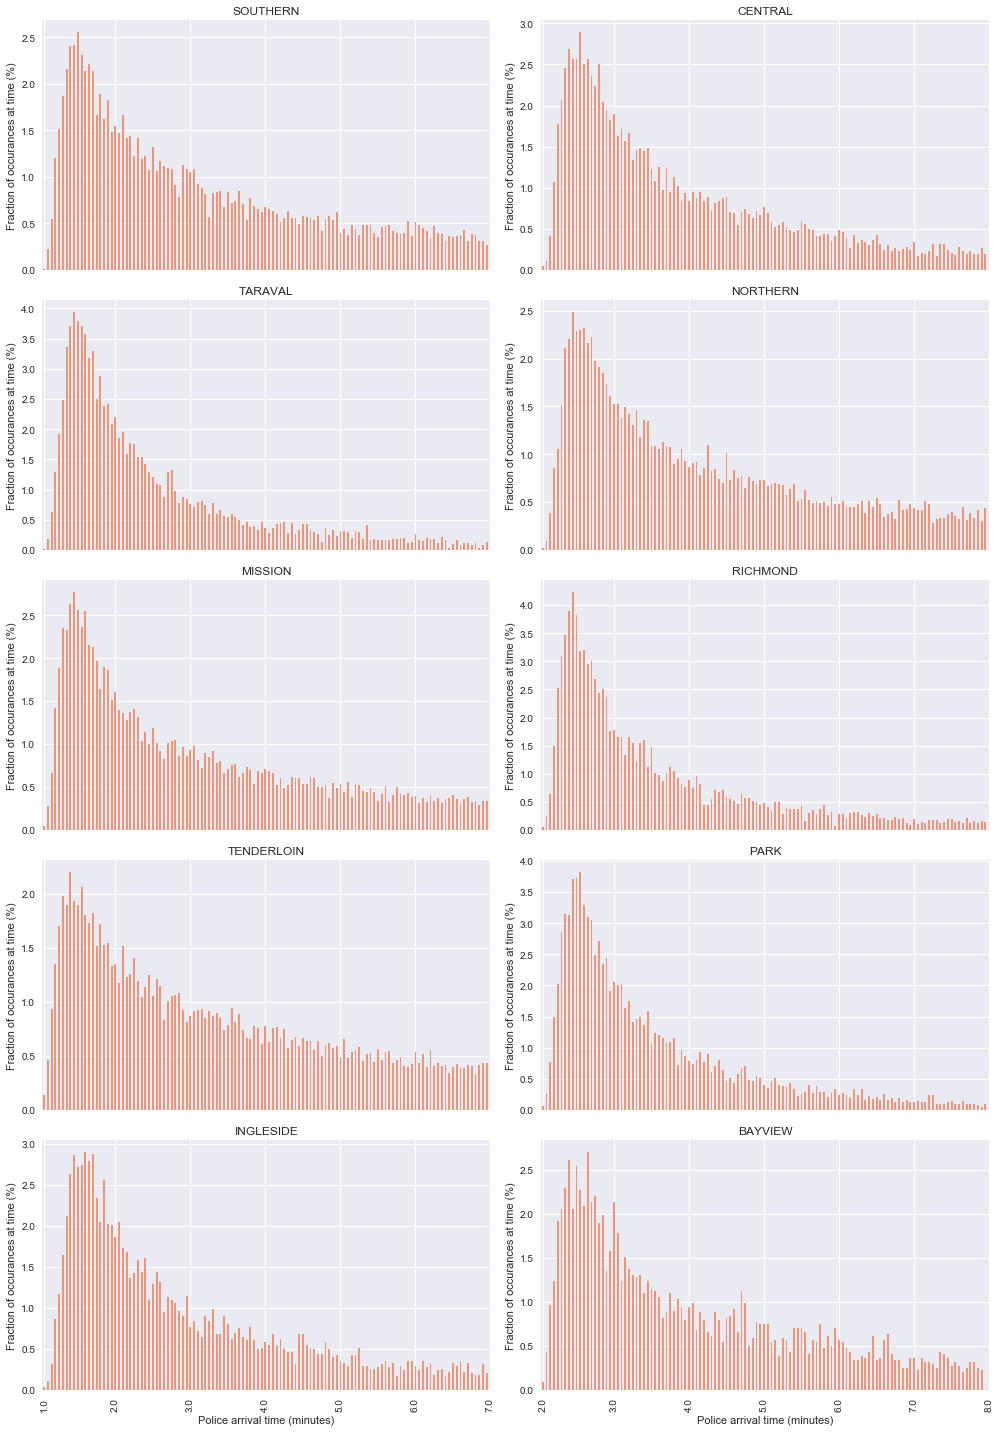

In [36]:

a = 5 # number of rows
b = 2  # number of columns
c = 1  # initialize plot counter

fig = plt.figure(figsize=(14,20))

#Loop though previosuly defined police district list
for i in list_pdis:
    
    plt.subplot(a, b, c)
    plt.title('{}'.format(i))
    plt.xlabel("Police arrival time (minutes)")
    plt.ylabel("Fraction of occurances at time (%)")
    
    #Calculate normalized results
    #plots = data[data['police_district'] == i]['Diff_min_round'].value_counts().sort_index()
    plots_norm = csv_b[csv_b['police_district'] == i]['Police arrival round'].value_counts(normalize=True).sort_index()*100
    
 
    plots_norm.plot(kind='bar', sharex=True, color='darksalmon')
     
    c = c + 1
    plt.xticks([0,19,39,59,79,99,119])

  
plt.tight_layout()
plt.show()

<center> <b>Fig 4.</b> <i> The histograms demonstrate that police activity is following the typical shape for the task completion times (Janert, 2010). The histograms showcase how often the case was solved within the specific period of time (in minutes), among all the cases that were solved within two hours. It can be observed that most of the cases are solved within 5 to 15 minutes from the moment the call was received. The value is presented in the percentage of cases that took a specific amount of time to complete. For example, in TRAVAL and RICHMOND regions the peak fluctuates around 3-4%, which shows that out of all the cases that were solved within 120 minutes cases that took one of the times between 5 and 10 minutes constitute to approximately 3% to 4%. The histograms for these regions also have a “tail” that is decreasing significantly. It means that fewer cases have taken more time complete. </i> <center>
    

**Choice of visualization:** The intention with this visualization was to showcase the time it takes the police to react and solve the cases reported by the public. We have considered doing it though the use of Kernel Density Estimate (KDE) curves, but due to its complexity to appropriately define bandwidths (Janert, 2010) and their potential to be misleading, we have chosen to do it through histograms. The histogram gives the viewer initial feeling for the user of the frequency of the cases per time and allows a more knowledgeable reader to look more in detail into the numbers.




## Visualization #3

### *Please, be aware that the graph will open in a new tab*


### Counts by years in different district

In [37]:
csv_c = csv_a.copy()

In [38]:
csv_c['received_datetime'].isnull().sum()

0

In [39]:
csv_c=csv_c.dropna(subset=['received_datetime'])

In [40]:
#ALREADY DONE ABOVE DELETE LATER

#csv_c['received_year'] = csv_c['received_datetime'].dt.year
#csv_c=csv_c[csv_c['received_year']!=2015 ]

#### As can be seen here, we only have data left with police DISTRICT information for the years 2016 to 2022.

In [41]:
list_years=list(csv_c['received_year'].unique())
list_years.sort()
list_years

[2016, 2017, 2018, 2019, 2020, 2021, 2022]

In [42]:
csv_c=csv_c.dropna(subset=['police_district'])
list_pdis=list(csv_c['police_district'].unique())
list_pdis

['CENTRAL',
 'SOUTHERN',
 'TARAVAL',
 'NORTHERN',
 'MISSION',
 'RICHMOND',
 'TENDERLOIN',
 'PARK',
 'INGLESIDE',
 'BAYVIEW']

#### Here the data is grouped by year of receipt, then each year is grouped by police district and counted.

In [43]:
dic_dis=dict(list(csv_c[['police_district','received_year']].groupby('received_year')))

for year,data_1 in dic_dis.items():
    data_2=data_1.groupby('police_district').count().reset_index()
    data_2=data_2.rename(columns={'received_year': 'count'})
    dic_dis[year]=data_2
dic_dis

{2016:   police_district  count
 0         BAYVIEW   1253
 1         CENTRAL   3070
 2       INGLESIDE   1270
 3         MISSION   4031
 4        NORTHERN   2759
 5            PARK   1452
 6        RICHMOND    851
 7        SOUTHERN   3533
 8         TARAVAL   1346
 9      TENDERLOIN   5228,
 2017:   police_district  count
 0         BAYVIEW    984
 1         CENTRAL   2809
 2       INGLESIDE   1154
 3         MISSION   4048
 4        NORTHERN   2658
 5            PARK   1423
 6        RICHMOND    827
 7        SOUTHERN   3017
 8         TARAVAL   1150
 9      TENDERLOIN   4885,
 2018:   police_district  count
 0         BAYVIEW   1100
 1         CENTRAL   3288
 2       INGLESIDE   1108
 3         MISSION   4794
 4        NORTHERN   3530
 5            PARK   1575
 6        RICHMOND    980
 7        SOUTHERN   4390
 8         TARAVAL   1133
 9      TENDERLOIN   7393,
 2019:   police_district  count
 0         BAYVIEW   1021
 1         CENTRAL   2993
 2       INGLESIDE   1049
 3         

In [44]:
from bokeh.models import ColumnDataSource, FactorRange
from bokeh.plotting import figure, show
from bokeh.transform import factor_cmap
from bokeh.palettes import Set3


palette = Set3[8]
districts = list_pdis
years = list_years
counts=[]
x = [ (district, str(year)) for district in districts for year in years ]
for i in x:
    dataf = dic_dis[int(i[1])]
    counts.append(int(dataf[dataf['police_district']==i[0]]['count']))
counts=tuple(counts)


source = ColumnDataSource(data=dict(x=x, counts=counts))

p = figure(x_range=FactorRange(*x),width=1500, height=600, title="Counts by Year",
           toolbar_location=None, tools="")

# years_str = list(map(str,years))
years_str = [str(year) for year in years]

p.vbar(x='x', top='counts', width=0.9, source=source, line_color="white",
       fill_color=factor_cmap('x', palette=palette, factors=years_str, start=1, end=2))

p.y_range.start = 0
p.x_range.range_padding = 0.1
p.xaxis.major_label_orientation = 1
p.xgrid.grid_line_color = None

p.title.text = 'Police District Incident Counts by Year in San Francisco'
p.title.align = "center"
p.xaxis.axis_label = 'Police Districts and Years'
p.yaxis.axis_label = 'Incident Counts'

show(p)

With this multiple bar chart, we can clearly see the comparison of the number of cases between different regions, while also showing how the number of cases within a region changes over time. Overall, this chart contains a lot of information, is comprehensive, and can be analyzed from various aspects.

---------------------

## Visualization #4

#### Here some data without specific coordinate locations have been removed to draw a heat map.

In [45]:
csv_d=csv_a.copy()
csv_d=csv_d.dropna(subset=['intersection_point'])
csv_d=csv_d.reset_index()

#### Converts a column of coordinate pairs, into two columns of x, y values.

In [46]:
csv_d['intersection_point']
csv_d['x'] = csv_d['intersection_point'].str.split().str.get(1).str.strip('()').astype(float)
csv_d['y'] = csv_d['intersection_point'].str.split().str.get(2).str.strip('()').astype(float)
csv_d=csv_d[csv_d['call_type_final_desc']=='SUSPICIOUS PERSON']

In [47]:
csv_d=csv_d[['x','y']]

In [48]:
csv_d.head()

x          y
0 -122.407906  37.794060
1 -122.415560  37.773100
2 -122.412224  37.773285
3 -122.413980  37.807484
4 -122.454120  37.723457

In [49]:
csv_d.shape

(155644, 2)

In [50]:
import folium
from folium.plugins import HeatMap
import json
from urllib.request import urlopen

url = 'https://raw.githubusercontent.com/suneman/socialdata2022/main/files/sfpd.geojson'
geo_json_data = json.loads(urlopen(url).read().decode('utf-8'))

sf_coords = (37.7749, -122.4194)
map = folium.Map(location=sf_coords, zoom_start=12)

heat_data = [[row['y'], row['x']] for index, row in csv_d.iterrows()]

HeatMap(heat_data, name='Heatmap', min_opacity=0.3, max_opacity=0.9, blur=10, radius=15).add_to(map)
folium.GeoJson(geo_json_data, style_function=lambda feature: {'weight': 1}).add_to(map)

map


<center> <b>Fig 5.</b> <i>The Heatmap identifies the areas with where the cases for the "Suspicious Person" were reported. The cases are assigned the closest intersection on the map to keep anonimity of the caller. </i> <center>
    

# Here is the heat map for SUSPICIOUS PERSON.

---------------------

## Visualization #5

In [51]:
csv_m = csv_a.copy()

csv_m = csv_m.loc[(csv_m['priority_original'] == 'A') | (csv_m['priority_original'] == 'B') | (csv_m['priority_original'] == 'C')]

csv_m.rename(columns = {'priority_original':'Priority given to a call', 'police_district':'District'}, inplace = True)

data_priority = csv_m.groupby(['District'])['Priority given to a call'].value_counts(normalize=True).unstack().mul(100)


fig = px.bar(data_priority, barmode='group', color_discrete_sequence=px.colors.qualitative.Safe, title="Distribution of priorities assigned to a call per district")

fig.update_traces(textfont_size=12, textangle=0, textposition="outside", cliponaxis=False)
fig.show()

<center> <b>Fig 6.</b> <i>Bar chart deomnstartes what fraction of all cases are assigned A, B or C priorities per district in San Francisco. It is evident that the most common priority for a SUSPICIOUS PERSON is C, while it is very rare that A priority is given. The difference per district can also be observed, as C priority is given for over 90% of cases in TENDERLOIN, while TRAVAL has a relatively close amount of C (just over 60%) and B (approximately 40%) priorities assigned to the cases.  </i> <center>
    

**Choice of visualization:** The bar chart demonstrates the fraction of A, B and C priorities assigned to cases that were reported in different police districts. The bars allow us to compare the ratio between cases in one district but also allow us to compare the situations in different districts. If we have not taken this course we probably would have visualised it by the use of pie charts which would not have allowed us and the reader to compare the results easily between districts and were not have been as visually obvious when comparing per specific district.

In [52]:
# Finding the difference between the priority intially given to the call and final priority given after the incident was solved

csv_m.rename(columns = {'priority_final':'Call Priority'}, inplace = True)

csv_m = csv_m.loc[(csv_m['Call Priority'] == 'A') | (csv_m['Call Priority'] == 'B') | (csv_m['Call Priority'] == 'C')]
data_priority_final = csv_m.groupby(['District'])['Call Priority'].value_counts(normalize=True).unstack().mul(100)
Difference = (data_priority_final-data_priority)

fig = px.bar(Difference, barmode='group', opacity=.5, color_discrete_sequence=px.colors.qualitative.Safe)
fig.show()

<center> <b>Fig 7.</b> <i>Bar chart demonstrates the difference between the priorities assigned to the case initially and after the cases were solved. The difference is demonstrated in a fraction of 100 per priority per district. It can be observed that when comparing initially assigned and final priorities there is a decrease in C priorities and an increase in both A and B priorities in each district.  </i> <center>

## Visualization  #6


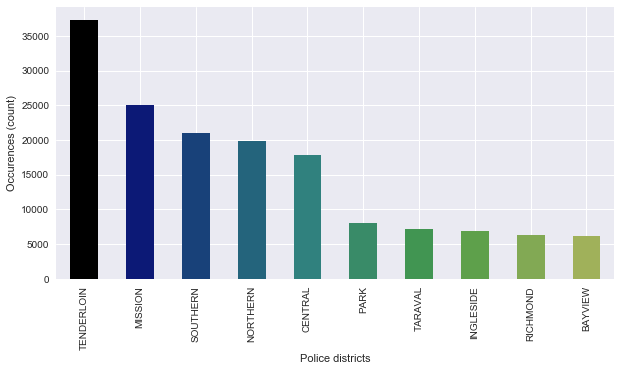

In [53]:
csv_f = csv_a.copy()
csv_f = csv_f[csv_f['call_type_final_desc'] == 'SUSPICIOUS PERSON']

plt.rcParams["figure.figsize"] = (20,9)
plt.style.use("seaborn")
fig_color = plt.cm.gist_earth(np.linspace(0, 1, 15))

count_districts = csv_f["police_district"].value_counts()
count_districts.plot(kind="bar",color=fig_color,figsize=(10,5))
plt.xlabel("Police districts")
plt.ylabel("Occurences (count)")
plt.show()  

<center> <b>Fig 8.</b> <i> A bar chart showing police districts with counted suspicious person as case  </i> <center>

## Visualization #7

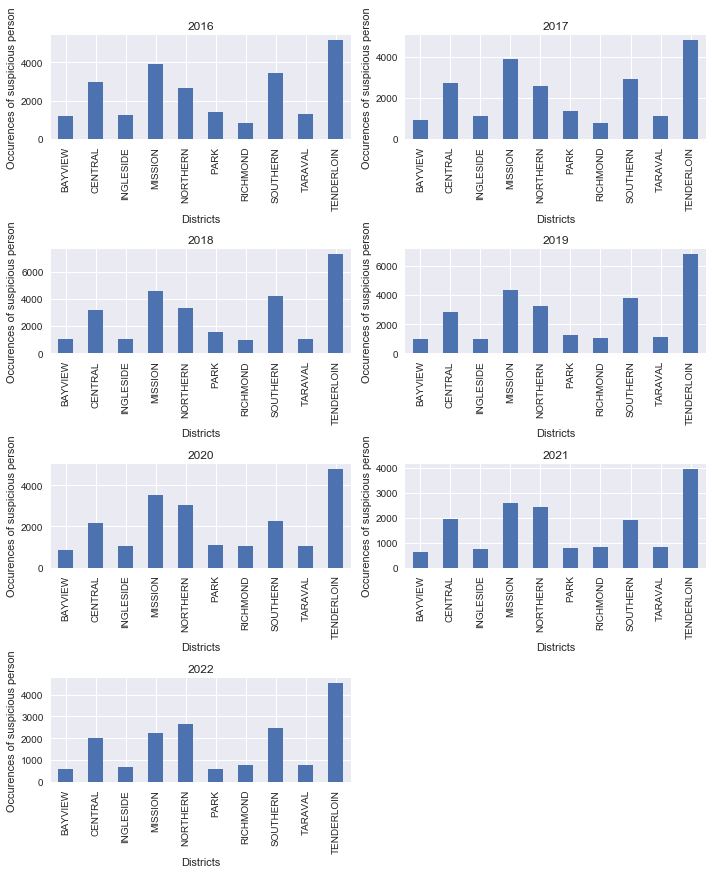

In [54]:
fig = plt.figure(figsize=(10,20))
unique_years = list(csv_f["received_datetime"].dt.year.unique())

for i, year in enumerate(unique_years):
    csvf_i = csv_f.loc[csv_f["received_datetime"].dt.year == year]
    districts_per_year = csvf_i["police_district"].value_counts()
    ax = fig.add_subplot(7,2,i+1)
    districts_per_year.sort_index().plot.bar(title=year,xlabel="Districts"
    ,ylabel="Occurences of suspicious person")

fig.tight_layout(rect=[0, 0, 1, 0.99])
plt.show()

<center> <b>Fig 9.</b> <i> Subplots show occurence of suspicious person for each district in each year </i> <center>

## Visualization #8

findfont: Font family ['Helvetica'] not found. Falling back to DejaVu Sans.


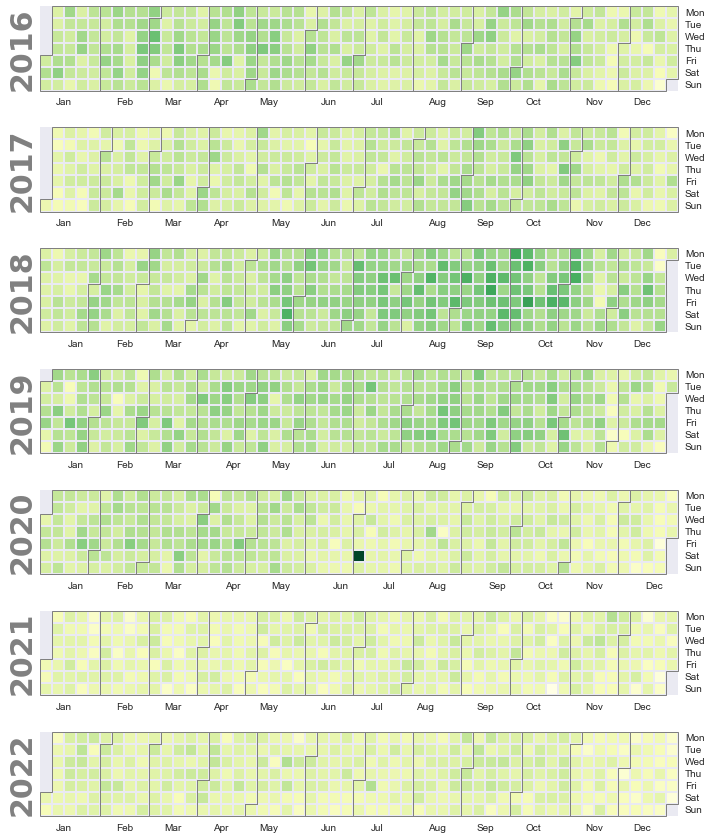

In [55]:
### Visual #8

calplot.calplot(pd.Series(csv_f["received_datetime"].value_counts(),index=csv_f["received_datetime"]),cmap="YlGn",colorbar=False)
plt.show()

<center> <b>Fig 10.</b> <i> A calendar plot showing cases with Suspicious person for each year </i> <center>

## Visualization #9

In [56]:
from bokeh.plotting import figure, show
from bokeh.models import HoverTool

weekends = ["Saturday","Sunday"]

csv_f["weekend"] = csv_f["received_datetime"].dt.day_name().isin(weekends)
csv_f["received_dt_hour"] = csv_f["received_datetime"].dt.hour 

filter_weekend = csv_f[csv_f["weekend"] == True]
filter_weekdays = csv_f[csv_f["weekend"] == False]
weekend_time = filter_weekend["received_dt_hour"].value_counts().sort_index()
weekdays_time = filter_weekdays["received_dt_hour"].value_counts().sort_index()

# x and y values for weekend DF
x1 = list(weekend_time.index)
y1 = list(weekend_time)

# x and y values for weekdays DF
x2 = list(weekdays_time.index)
y2 = list(weekdays_time)

legend_label_weekend = "Weekend"
legend_label_weekdays = "Weekdays"

p = figure(title="Occurences of suspicious person per hour during weekdays and weekend", 
           x_axis_label = "Hour", y_axis_label = "Occurences",
           width=600, height=350)

weekend_line = p.line(x1,y1, legend_label= legend_label_weekend, color="green", line_width=4, muted_alpha=0.2,muted=False)
p.circle(x1,y1,color="green",legend_label= legend_label_weekend, fill_color="white",line_width=6,muted_alpha=0.2,muted=False)

weekdays_line = p.line(x2,y2,legend_label=legend_label_weekdays,color="blue",line_width=4,muted_alpha=0.2,muted=False)
p.circle(x2,y2,color="blue",legend_label=legend_label_weekdays, fill_color="white",line_width=6,muted_alpha=0.2,muted=False)

p.add_tools(HoverTool(tooltips=[('Occurences of suspicious person weekday', '@y')], renderers=[weekdays_line]))
p.add_tools(HoverTool(tooltips=[('Occurences of suspicious person weekend', '@y')], renderers=[weekend_line]))

p.legend.click_policy="hide"


show(p)

<center> <b>Fig 11.</b> <i> A bokeh plot that shows the occurences of cases with suspicious person during weekdays and weekend. One can hover to see the occurences of cases for a given hour. In addition one can hide categories weekend and weekdays  </i> <center>

## Visualization #10

In [57]:
# Inspirations:
# https://plotly.com/python/choropleth-maps/#customize-choropleth-chart
# https://plotly.com/python/custom-buttons/

with urlopen('https://raw.githubusercontent.com/suneman/socialdata2022/main/files/sfpd.geojson') as response:
    counties = json.load(response)

import plotly.graph_objects as go

occurences_2016 = csv_f[csv_f["received_datetime"].dt.year == 2016]
occurences_2017 = csv_f[csv_f["received_datetime"].dt.year == 2017]
occurences_2018 = csv_f[csv_f["received_datetime"].dt.year == 2018]
occurences_2019 = csv_f[csv_f["received_datetime"].dt.year == 2019]
occurences_2020 = csv_f[csv_f["received_datetime"].dt.year == 2020]
occurences_2021 = csv_f[csv_f["received_datetime"].dt.year == 2021]
occurences_2022 = csv_f[csv_f["received_datetime"].dt.year == 2022]

occurences_2016 = occurences_2016["police_district"].value_counts().sort_values(ascending = False)
occurences_2017 = occurences_2017["police_district"].value_counts().sort_values(ascending = False)
occurences_2018 = occurences_2018["police_district"].value_counts().sort_values(ascending = False)
occurences_2019 = occurences_2019["police_district"].value_counts().sort_values(ascending = False)
occurences_2020 = occurences_2020["police_district"].value_counts().sort_values(ascending = False)
occurences_2021 = occurences_2021["police_district"].value_counts().sort_values(ascending = False)
occurences_2022 = occurences_2022["police_district"].value_counts().sort_values(ascending = False)


fig = go.Figure(data = go.Choroplethmapbox(
                           z=occurences_2016, 
                           geojson=counties, 
                           locations= occurences_2016.index, 
                           colorscale="reds",
                           zmin=min(occurences_2016.tolist()), 
                           zmax=max(occurences_2016.tolist()),
                           marker_opacity=0.5, 
                           marker_line_width=0.1
                          ))

fig.update_layout(coloraxis_colorscale="reds",margin={"r":0,"t":0,"l":0,"b":0}, mapbox=dict(style='carto-positron',
                              zoom=9.3, center = {"lat": 37.77, "lon": -122.40}))

fig.update_layout(
    updatemenus = [
        dict(
            type="buttons",
            buttons=[
                dict(
                    label="2016",
                    method="relayout",
                    args=[
                        {"z": [occurences_2016]},
                        {"zmax": max(occurences_2016.tolist())},
                        {"colorscale":"reds"},
                    ]
                ),
                 dict(
                    label="2017",
                    method="update",
                    args=[
                        {"z": [occurences_2017]},
                        {"colorscale":"reds"},
                        {"zmax": max(occurences_2017.tolist())},
                        
                    ]
                ),
                 dict(
                    label="2018",
                    method="update",
                    args=[
                        {"z": [occurences_2018]},
                        {"colorscale":"reds"},
                        {"zmax": max(occurences_2018.tolist())}
                    ]
                ),
                 dict(
                    label="2019",
                    method="update",
                    args=[
                        {"z": [occurences_2019]},
                        {"colorscale":"reds"},
                        {"zmax": max(occurences_2019.tolist())}
                    ]
                ),
                 dict(
                    label="2020",
                    method="update",
                    args=[
                        {"z": [occurences_2020]},
                        {"colorscale":"reds"},
                        {"zmax": max(occurences_2020.tolist())}
                    ]
                ),
                dict(
                    label="2021",
                    method="update",
                    args=[
                        {"z": [occurences_2021]},
                        {"colorscale":"reds"},
                        {"zmax": max(occurences_2021.tolist())},
                    #    {"coloraxis.colorscale":"reds"}
                    ]
                ),
                  dict(
                    label="2022",
                    method="update",
                    args=[
                        {"z": [occurences_2022]},
                        {"colorscale":"reds"},
                        {"zmax": max(occurences_2022.tolist())},
                    ]
                )
            ]
        ),
    ]
)


fig.show()

<center> <b>Fig 12.</b> <i> A Choroplethmap shows the distribution of counted cases with SUSPICIOUS PERSON for each district in San Francisco. Here a user can select between years 2016-2022 to see the distribution for each year. Those districts that have a dark color in the color scale can be seen as districts with many cases. The default map shows the distribution of occurences for each district in 2016 </i> <center>

### **Discussion**


In our assessment, there are still numerous possibilities to exploit by delving deeper into the dataset. Although we have provided insights into the time taken by the police to process cases and the significance attributed to them, we believe a more comprehensive comprehension of the situation could be attained by concentrating on the progression of these crimes (i.e., the outcome of the initial call) in each district. This approach could highlight the specific challenges faced in each area, potentially explaining the reasons behind differences in the time and importance assigned to a case in a particular region.


### **Contribution**

Student s213214 contributed by proposing the initial idea to use this specific data set and what can be evaluated and made a video in the first part of the final assignment. In addition, the student conducted data analysis and cleaning, thought understanding the specifics of the data, how data has to be cleaned to only use the relevant values and did it practically. In addition the student worked on various data visualizations such as priority analysis, analysis of process time for urgent cases, analysis of call development and etc. The student contributed by writing the text for the article on the website and answering questions of the final assignment. 

Student s212495 developed some initial ideas for potential visualisations based on the dataset and produced a simple visual heat map for the first part of the final assignment. In addition, the student carried out data analysis and cleaning for the graphs to be made. In addition, the student worked on various data visualisations such as Trends (average processing time) by years in different districts, Counts by years in different districts and a heatmap of case distributions. the student worked on the data visualisation by writing for the website The students contributed by writing text for articles on the website and answering questions for the final assignment.


Student s226695 have contributed by creating basic visualizations such as yearly and hourly basis, calendar plot and Choroplethmap (Visualization 6-10). In addition, the student has contributed to questions for the final assignment as well as being responsible for setup of the website and for a clear structure of the website.  

### References

Janert, P. K. (2010). Data Analysis with Open Source Tools. http://cds.cern.ch/record/1438426/files/9780596802356_TOC.pdf